In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# check number  of rows and column

In [ ]:
df.shape

(11914, 10)

# Dropping irrelevent features


In [10]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis = 1)

# Rename the column

In [42]:
df = df.rename(columns = {"Make" : "Comapany", "Transmission Type" : "Type", "Number of Doors" : "Doors", "Market Category" : "Category"})

# check duplicate rows

In [6]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df)

number of duplicate rows:           Make     Model  Year             Engine Fuel Type  Engine HP  \
14        BMW  1 Series  2013  premium unleaded (required)      230.0   
18       Audi       100  1992             regular unleaded      172.0   
20       Audi       100  1992             regular unleaded      172.0   
24       Audi       100  1993             regular unleaded      172.0   
25       Audi       100  1993             regular unleaded      172.0   
...       ...       ...   ...                          ...        ...   
11481  Suzuki      X-90  1998             regular unleaded       95.0   
11603   Volvo      XC60  2017             regular unleaded      302.0   
11604   Volvo      XC60  2017             regular unleaded      240.0   
11708  Suzuki       XL7  2008             regular unleaded      252.0   
11717  Suzuki       XL7  2008             regular unleaded      252.0   

       Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors  \
14             

# data type

In [16]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
highway MPG            int64
city mpg               int64
MSRP                   int64
dtype: object

# delete duplicate

In [19]:
df = df.drop_duplicates()
df.head(5)
df.count()

Make                 10925
Model                10925
Year                 10925
Engine HP            10856
Engine Cylinders     10895
Transmission Type    10925
Driven_Wheels        10925
highway MPG          10925
city mpg             10925
MSRP                 10925
dtype: int64

# check for null values

In [21]:
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
highway MPG           0
city mpg              0
MSRP                  0
dtype: int64

# drop null values

In [25]:
df = df.dropna()

# detecting outliers

In [27]:
var  = df['highway MPG']

Q1 = var.quantile(0.25)
Q3  = var.quantile(0.75)
IQR = Q3 - Q1
print(IQR) 

8.0


In [28]:
import seaborn as sns

<Axes: xlabel='MSRP'>

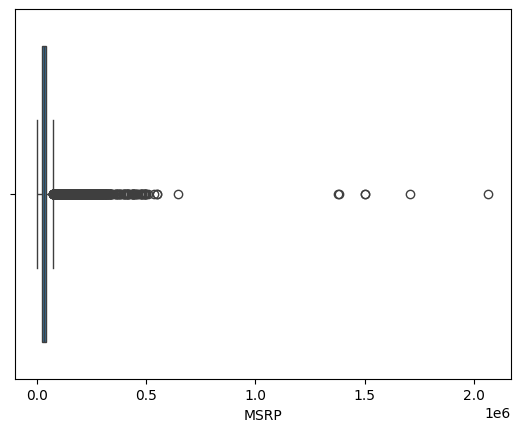

In [31]:

sns.boxplot(x=df['MSRP'])


Text(0.5, 0, 'Company')

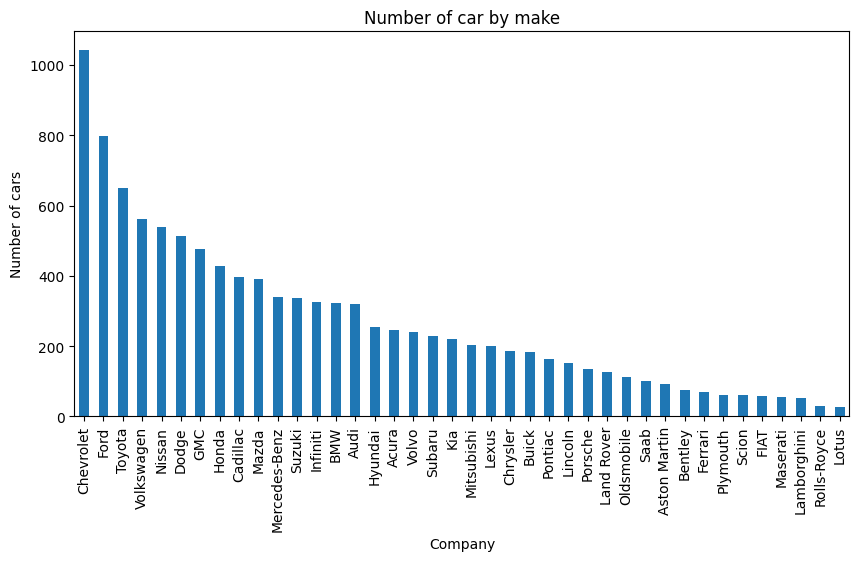

In [44]:
df.Comapany.value_counts().nlargest(40).plot(kind = 'bar', figsize = (10,5))
plt.title("Number of car by make")
plt.ylabel("Number of cars")
plt.xlabel("Company")

# Heat Map

<Axes: >

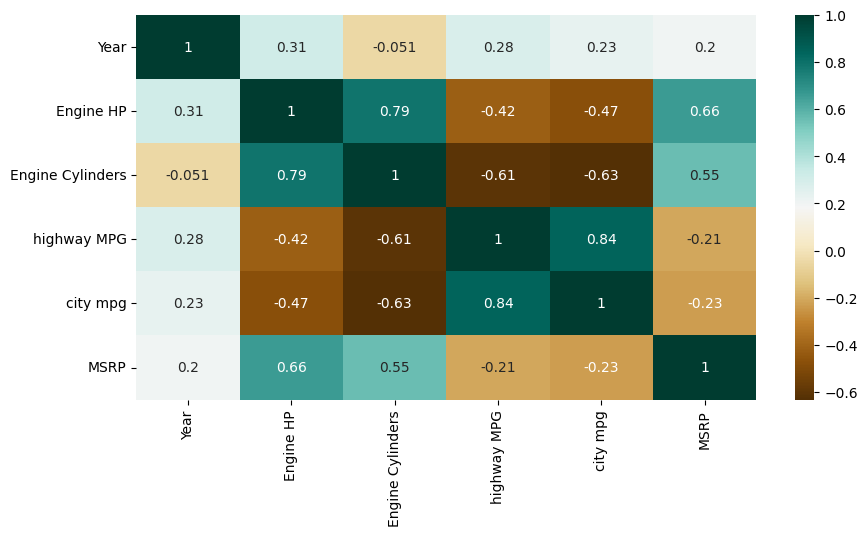

In [47]:
plt.figure(figsize=(10, 5))
c = df.corr(numeric_only= True)
sns.heatmap(c, cmap="BrBG",  annot= True)

# creating a new column by multiplying existing two column

In [16]:

df['Make']
df['multi'] = df['Engine HP'] * df['Engine Cylinders']
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,multi
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,2010.0
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,1800.0
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,1800.0
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,1380.0
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,1380.0


In [22]:
display(df.loc[0:5])

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,multi
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,2010.0
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,1800.0
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,1800.0
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,1380.0
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,1380.0
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200,1380.0


In [2]:
df.loc('Make' == BMW)

NameError: name 'df' is not defined

In [23]:
display(df.iloc[0:5,0:3])

,Make,Model,Year
0,BMW,1 Series M,2011
1,BMW,1 Series,2011
2,BMW,1 Series,2011
3,BMW,1 Series,2011
4,BMW,1 Series,2011


In [24]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
multi                  98
dtype: int64

In [1]:
df.fillna()

NameError: name 'df' is not defined